# Итоговое задание по практике:
# Анализ онлайн-рынка персональных компьютеров

## Шаг 0. Импорт необходимых библиотек

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

## Шаг 1. Загрузка и предварительная обработка данных

Исходные данные:
- идентификатор товара (product_id)
- наименование товара (title)
- цена товара в руб. (price)
- количество продаж (sales)
- количество отзывов (feedbacks)
- наименование продавца (seller)
- рейтинг продавца (seller_rating)
- данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип),
о количестве ядер процессора (Количество ядер процессора)
- данные об оперативной памяти (Оперативная память), в т. ч. о типе
оперативной памяти (Тип оперативной памяти), об объеме оперативной
памяти (Объем оперативной памяти (Гб))
- данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD
(Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)
- данные о видеопроцессоре (Видеопроцессор)
- данные об операционной системе (Операционная система)
- данные о гарантийном сроке (Гарантийный срок)
- страна производства (Страна производства)
- данные о габарите товара (Габариты товара), в т. ч. о ширине предмета
(Ширина предмета), о глубине предмета (Глубина предмета), о высоте
предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))
- данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т.
ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),
о высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с
упаковкой (кг))

In [33]:
df = pd.read_excel('wb_pc_easy.xlsx', sheet_name='Sheet1', engine='openpyxl')

In [34]:
df.head(n=10)

,Идентификатор товара,Наименование,"Цена, руб.",Продавец,Видеопроцессор,Операционная система,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),Объем накопителя HDD,Объем накопителя SSD
0,17877962,Системный блок,32900,не указан,не указано,не установлена,Intel,NaN,не заполнено,16.0,не заполнено,256 Gb
1,17880420,Компьютер Hp Prodesk 400 g6 mt,35720,не указан,не указано,не установлена,не заполнено,NaN,не заполнено,16.0,не заполнено,512 Gb
2,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
3,36416268,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,89113,Robotcomp,NVIDIA,WINDOWS,Intel,6.0,DDR 4,16.0,не заполнено,60 Gb
4,45087757,Игровой компьютер Robotcomp F22 Raptor V1 Plus,50969,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
5,45915905,Игровой компьютер Robotcomp F22 Raptor Plus V3,61890,Robotcomp,NVIDIA,WINDOWS,Intel,4.0,DDR 4,32.0,не заполнено,480 Gb
6,46455023,Игровой Компьютер Robotcomp Аллигатор 2.0 V2 Plus,37151,Robotcomp,AMD,WINDOWS,AMD,6.0,DDR 4,32.0,не заполнено,512 Gb
7,46460220,Игровой Компьютер Robotcomp ТУ 160 V2 Plus,103665,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
8,46461423,Игровой Компьютер Robotcomp ТУ 160 V3 Plus,110184,Robotcomp,NVIDIA,WINDOWS,Intel,10.0,DDR 4,32.0,не заполнено,60 Gb
9,46647908,"Компьютер Raskat Standart 510 (Ryzen 5 3600, R...",34794,не указан,NVIDIA,WINDOWS,AMD,6.0,DDR 4,8.0,не заполнено,256 Gb


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Идентификатор товара           2663 non-null   int64  
 1   Наименование                   2663 non-null   object 
 2   Цена, руб.                     2663 non-null   int64  
 3   Продавец                       2663 non-null   object 
 4   Видеопроцессор                 2663 non-null   object 
 5   Операционная система           2663 non-null   object 
 6   Процессор_тип                  2663 non-null   object 
 7   Количество ядер процессора     2587 non-null   float64
 8   Тип оперативной памяти         2663 non-null   object 
 9   Объем оперативной памяти (Гб)  2591 non-null   float64
 10  Объем накопителя HDD           2663 non-null   object 
 11  Объем накопителя SSD           2663 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage:

In [36]:
# Вывод количества пропусков по столбцам
df.isnull().sum()

Идентификатор товара              0
Наименование                      0
Цена, руб.                        0
Продавец                          0
Видеопроцессор                    0
Операционная система              0
Процессор_тип                     0
Количество ядер процессора       76
Тип оперативной памяти            0
Объем оперативной памяти (Гб)    72
Объем накопителя HDD              0
Объем накопителя SSD              0
dtype: int64

In [37]:
# Удаляем строки с пропущенными значениями
df.dropna(inplace=True)
# Вывод количества пропусков по столбцам
df.isnull().sum()

Идентификатор товара             0
Наименование                     0
Цена, руб.                       0
Продавец                         0
Видеопроцессор                   0
Операционная система             0
Процессор_тип                    0
Количество ядер процессора       0
Тип оперативной памяти           0
Объем оперативной памяти (Гб)    0
Объем накопителя HDD             0
Объем накопителя SSD             0
dtype: int64

In [79]:
UNKNOWN_MARKERS = {'не указано', 'не заполнено', 'не установлена', 'не установлена.', 'не указана', 'неопределено'}

In [80]:
def is_unknown(x):
    if pd.isna(x):
        return True
    if isinstance(x, str):
        return x.strip().lower() in UNKNOWN_MARKERS
    return False

In [82]:
missing_stats = (
    df.map(is_unknown)
      .agg(['sum'])
      .T
      .rename(columns={'sum': 'Missing_Count'})
)

In [84]:
missing_stats['Missing_%'] = (missing_stats['Missing_Count'] / len(df) * 100).round(2)
missing_stats = missing_stats.sort_values('Missing_%', ascending=False)

In [87]:
, # Отсутствующие значения по колонкам
missing_stats.reset_index().rename(columns={'index': 'Feature'})

,Feature,Missing_Count,Missing_%
0,HDD_GB,1683,65.16
1,Объем накопителя HDD,1676,64.89
2,Операционная система,92,3.56
3,Процессор_тип,75,2.90
4,Видеопроцессор,55,2.13
5,Тип оперативной памяти,21,0.81
6,DDR_ram_version,21,0.81
7,Объем накопителя SSD,18,0.70
8,SSD_GB,18,0.70
9,Количество ядер процессора,0,0.00


## Шаг 2. Определение типов данных и шкал измерения

In [38]:
df.dtypes

Идентификатор товара               int64
Наименование                      object
Цена, руб.                         int64
Продавец                          object
Видеопроцессор                    object
Операционная система              object
Процессор_тип                     object
Количество ядер процессора       float64
Тип оперативной памяти            object
Объем оперативной памяти (Гб)    float64
Объем накопителя HDD              object
Объем накопителя SSD              object
dtype: object

In [39]:
numeric_map = {
    "Объем оперативной памяти (Гб)": "RAM_GB",
    "Объем накопителя SSD": "SSD_GB",
    "Объем накопителя HDD": "HDD_GB",
    "Количество ядер процессора": "CPU_cores",
    "Тип оперативной памяти": "DDR_ram_version",
}


In [40]:
def str_to_float(series: pd.Series) -> pd.Series:
    """
    Корректно извлекает число (целое или десятичное) из строк,
    поддерживает оба разделителя ',' и '.'. Неподходящее → NaN.
    """
    cleaned = (
        series.astype(str)                      # всё в строку
              .str.replace(",", ".", regex=False)  # запятую → точку
              .str.extract(r"(\d+(?:\.\d+)?)")[0]  # первая группа "число[.число]"
    )
    return pd.to_numeric(cleaned, errors="coerce")

In [41]:
for old, new in numeric_map.items():
    if old in df.columns:
        df[new] = str_to_float(df[old])

In [42]:
# Переименуем цену для удобства
if "Цена, руб." in df.columns:
    df.rename(columns={"Цена, руб.": "Price_RUB"}, inplace=True)

In [43]:
# Проверяем результат
df[["Price_RUB", "CPU_cores", "RAM_GB", "SSD_GB", "HDD_GB"]].head(n=10)

,Price_RUB,CPU_cores,RAM_GB,SSD_GB,HDD_GB
2,79385,6.0,16.0,60.0,NaN
3,89113,6.0,16.0,60.0,NaN
4,50969,4.0,32.0,480.0,NaN
5,61890,4.0,32.0,480.0,NaN
6,37151,6.0,32.0,512.0,NaN
7,103665,10.0,32.0,60.0,NaN
8,110184,10.0,32.0,60.0,NaN
9,34794,6.0,8.0,256.0,NaN
10,37794,6.0,8.0,120.0,1000.0
11,133495,6.0,16.0,240.0,NaN


In [44]:
scale_map = {
    "Price_RUB":     "ratio",
    "CPU_cores":     "ratio",
    "RAM_GB":        "ratio",
    "SSD_GB":        "ratio",
    "HDD_GB":        "ratio",
    "Видеопроцессор": "nominal",
    "Процессор_тип":  "nominal",
    "Продавец":       "nominal"
}

In [45]:
scale_df = pd.DataFrame(scale_map.items(), columns=["Column", "Scale"])

In [46]:
scale_df

,Column,Scale
0,Price_RUB,ratio
1,CPU_cores,ratio
2,RAM_GB,ratio
3,SSD_GB,ratio
4,HDD_GB,ratio
5,Видеопроцессор,nominal
6,Процессор_тип,nominal
7,Продавец,nominal


## Шаг 3. Визуализация данных

### 3.1.0 Гистограммы для основных признаков

In [91]:
numeric_cols = ['Price_RUB', 'CPU_cores', 'RAM_GB',
                'SSD_GB', 'HDD_GB']
numeric_df = df[numeric_cols]

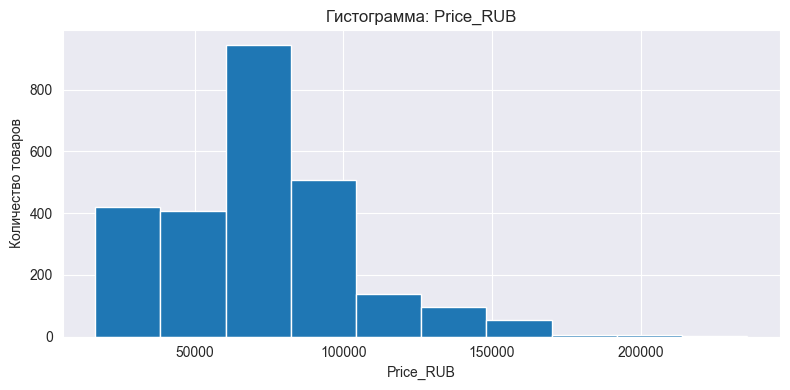

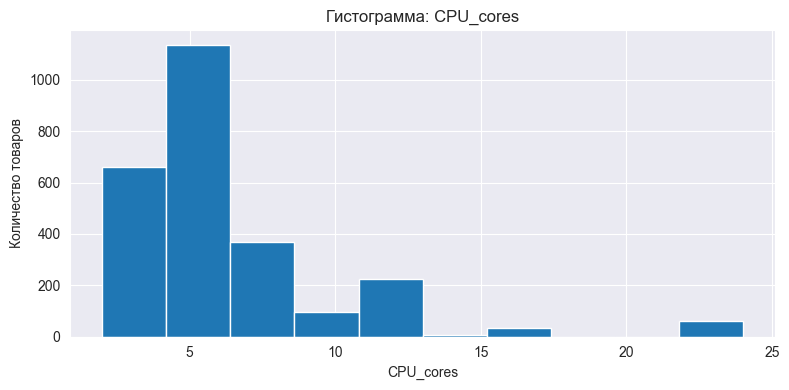

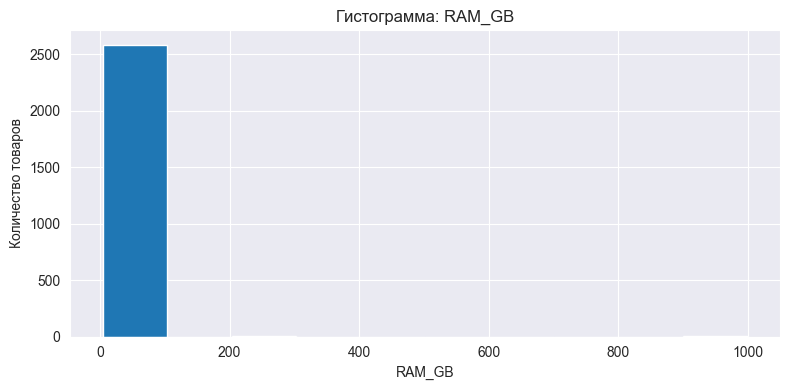

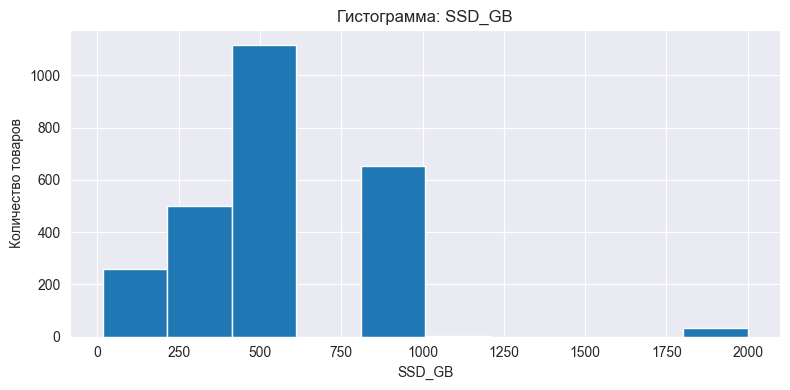

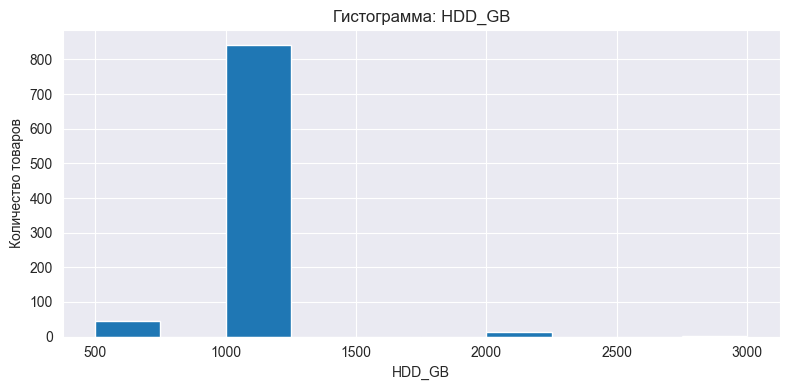

In [94]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(numeric_df[col].dropna())
    plt.title(f"Гистограмма: {col}")
    plt.xlabel(col)
    plt.ylabel("Количество товаров")
    plt.tight_layout()
    plt.show()

### 3.1.1 Гистограмма распределения цен на ПК

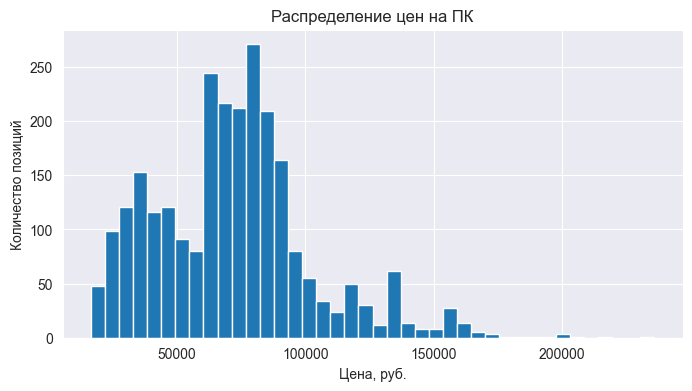

In [95]:
plt.figure(figsize=(8, 4))
plt.hist(df["Price_RUB"].dropna(), bins=40)
plt.title("Распределение цен на ПК")
plt.xlabel("Цена, руб.")
plt.ylabel("Количество позиций")
plt.grid(True)
plt.show()

### 3.1.2 Гистограмма популярности объема ОЗУ

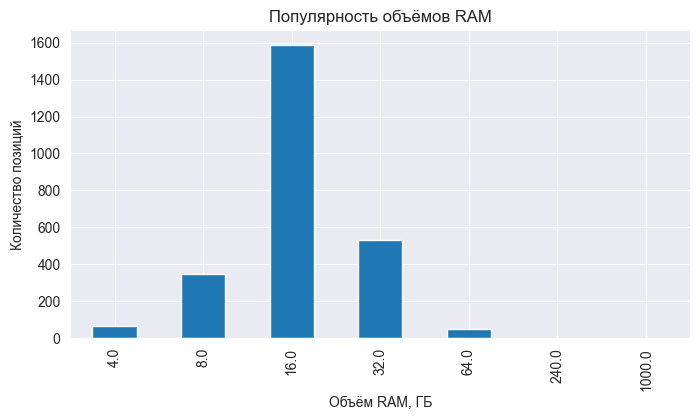

In [48]:
ram_counts = df["RAM_GB"].value_counts().sort_index()
ram_counts.plot(kind="bar", figsize=(8, 4))
plt.title("Популярность объёмов RAM")
plt.xlabel("Объём RAM, ГБ")
plt.ylabel("Количество позиций")
plt.grid(True, axis="y")
plt.show()

### 3.1.3 Гистограмма популярности кол-ва ядер процессора

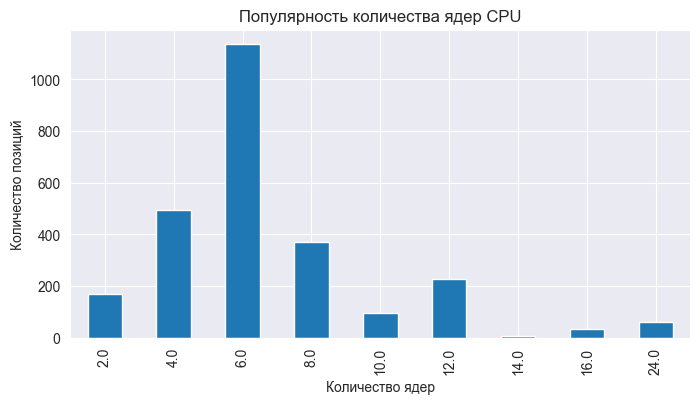

In [49]:
core_counts = df["CPU_cores"].value_counts().sort_index()
core_counts.plot(kind="bar", figsize=(8, 4))
plt.title("Популярность количества ядер CPU")
plt.xlabel("Количество ядер")
plt.ylabel("Количество позиций")
plt.grid(True, axis="y")
plt.show()

### 3.1.4 Гистограмма популярности объема твердотельного накопителя

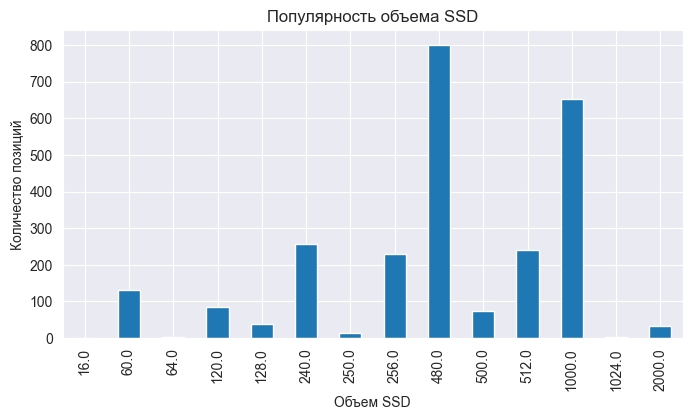

In [50]:
core_counts = df["SSD_GB"].value_counts().sort_index()
core_counts.plot(kind="bar", figsize=(8, 4))
plt.title("Популярность объема SSD")
plt.xlabel("Объем SSD")
plt.ylabel("Количество позиций")
plt.grid(True, axis="y")
plt.show()

### 3.1.5 Гистограмма топа непродающих ПК продавцов

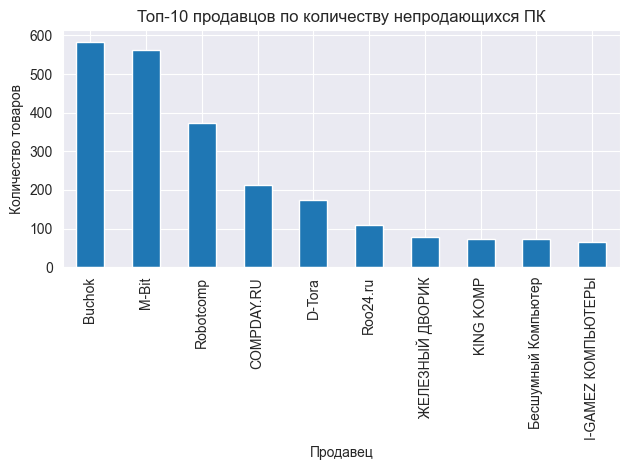

In [78]:
top_sellers = df['Продавец'].value_counts().head(10)
plt.figure()
top_sellers.plot(kind='bar')
plt.title("Топ-10 продавцов по количеству непродающихся ПК")
plt.xlabel("Продавец")
plt.ylabel("Количество товаров")
plt.tight_layout()
plt.show()

### 3.2 Боксплот цены по наличию ОС

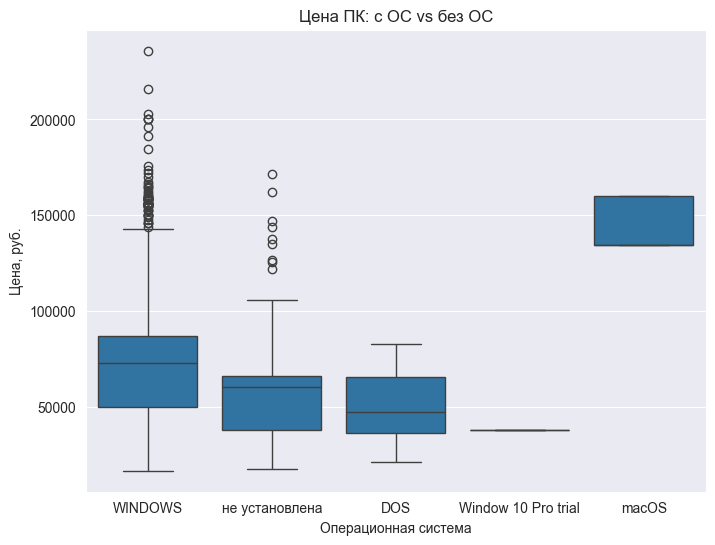

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Операционная система', y='Price_RUB', data=df)
plt.title('Цена ПК: с ОС vs без ОС')
plt.xlabel('Операционная система')
plt.ylabel('Цена, руб.')
plt.show()

### 3.3 Корреляционная матрица

In [102]:
numeric_df.corr()

,Price_RUB,CPU_cores,RAM_GB,SSD_GB,HDD_GB
Price_RUB,1.000000,0.375089,0.200471,0.389535,0.398213
CPU_cores,0.375089,1.000000,0.094161,0.188472,0.143347
RAM_GB,0.200471,0.094161,1.000000,0.077817,0.067604
SSD_GB,0.389535,0.188472,0.077817,1.000000,0.181049
HDD_GB,0.398213,0.143347,0.067604,0.181049,1.000000


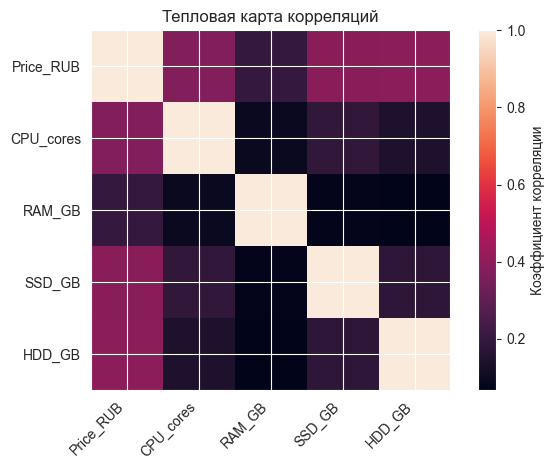

In [104]:
corr_matrix = numeric_df.corr()
plt.figure()
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar(label="Коэффициент корреляции")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Тепловая карта корреляций")
plt.tight_layout()
plt.show()

In [117]:
df.groupby('Операционная система')[['Price_RUB']].sum()

,Price_RUB
Операционная система,
DOS,1768356
WINDOWS,177014571
Window 10 Pro trial,37990
macOS,1016844
не установлена,5597980
